## 당뇨병 데이터 실습

1. import data         
2. 결측치 확인 및 제거            ---(3.18 추가)
3. x, y 분리           
4. 레이블 확인            ---(3.18 추가)
5. train, test 분리   
6. Boxplot             ---(3.18 추가)
7. 스케일링              ---(3.18 추가)
8. 산점도                ---(3.18 추가)
9. classifier 모델 실습  

### 1. Import data

In [31]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [32]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/yunseongmun/Documents/Ai_Lecture/data/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


### 2. 결측치 확인 및 제거

In [33]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:

# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3. X,y 분리

In [35]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [36]:
y=df['Outcome']
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

### 4. 레이블 확인

Outcome
0    500
1    268
Name: count, dtype: int64


Text(0.5, 1.0, 'Outcome')

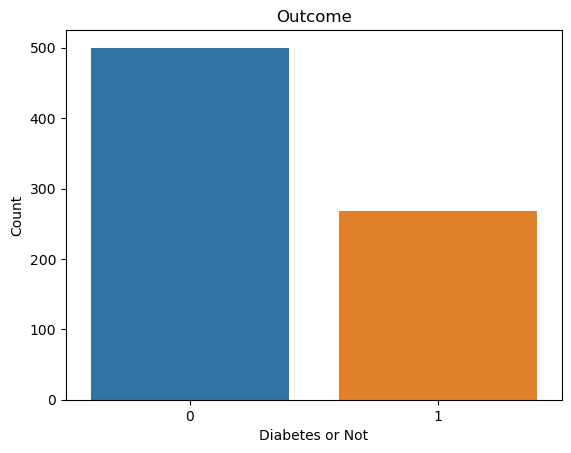

In [22]:
print(y.value_counts())
sns.countplot(data = df, x='Outcome')

plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

### 5. train, test 분리 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

### 6. Boxplot

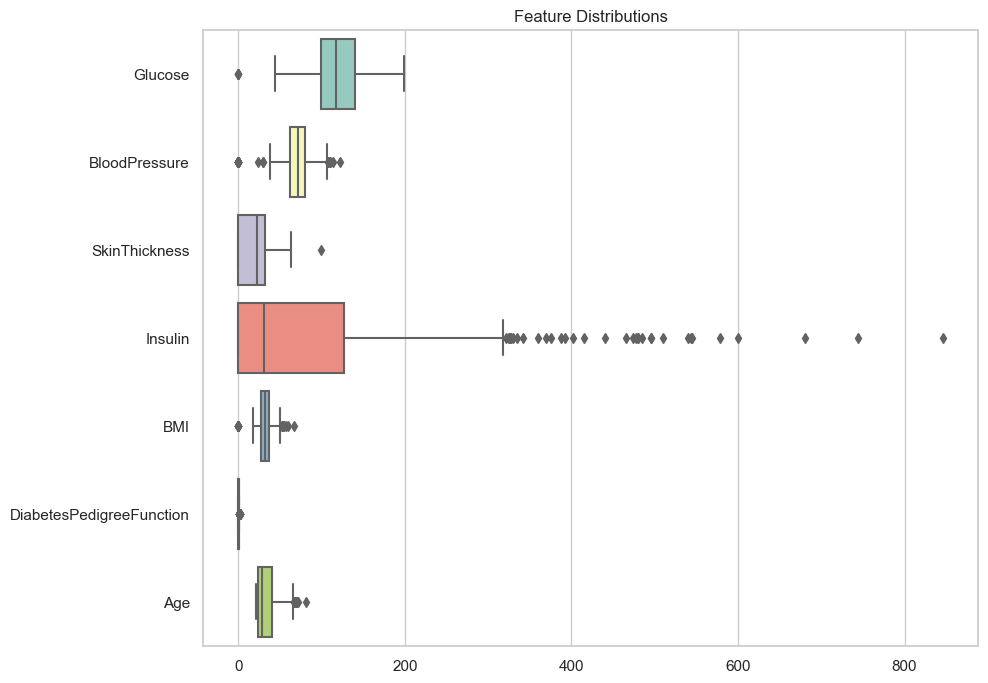

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 테마 설정
sns.set_theme(style="whitegrid")

# 'Outcome' 칼럼 제외하고 모든 특성에 대한 박스플롯 생성
# 이 예제에서는 'Outcome'을 제외하고 싶다고 가정합니다.
# 만약 모든 칼럼을 포함시키고 싶다면, df 대신 df.drop(['Outcome'], axis=1) 부분을 df로 변경하세요.
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.drop(['Outcome'], axis=1), palette="Set3", orient='h')

plt.title("Feature Distributions")
plt.show()


### 7. 스케일링
1. Min-Max Scaler : 최소값을 0으로 맞추고 최댓값을 1로 맞춤 (이상치가 많으면 안됨)
2. RobustScaler : 중앙값(median)과 IQR(사분위수 범위)을 사용
-> 실습에서는 이상치가 많아서 Robust가 적합함

In [44]:
from sklearn.preprocessing import MinMaxScaler


# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터에 대해 fit_transform 메서드를 호출하여 정규화
normalized_data = scaler.fit_transform(df)

# 변환된 데이터를 DataFrame으로 변환
min_max_df = pd.DataFrame(min_max_data, columns=df.columns, index=df.index)

# 변환된 데이터프레임 출력
min_max_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...
10,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
2,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
5,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0


In [47]:
from sklearn.preprocessing import RobustScaler

# RobustScaler 인스턴스 생성
scaler = RobustScaler()

# 데이터에 대해 fit_transform 메서드를 호출하여 스케일링
robust_scaled_data = scaler.fit_transform(df)

# 스케일링된 데이터를 DataFrame으로 변환
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=df.columns, index=df.index)

# 스케일링된 데이터프레임의 처음 몇 행을 출력
robust_scaled_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1.0
1,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0.0
8,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,1.0
1,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0.0
0,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294,1.0
...,...,...,...,...,...,...,...,...
10,-0.387879,0.222222,0.78125,1.174853,0.096774,-0.526797,2.000000,0.0
2,0.121212,-0.111111,0.12500,-0.239686,0.516129,-0.084967,-0.117647,0.0
5,0.096970,0.000000,0.00000,0.640472,-0.623656,-0.333333,0.058824,0.0


### 8. 산점도

/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


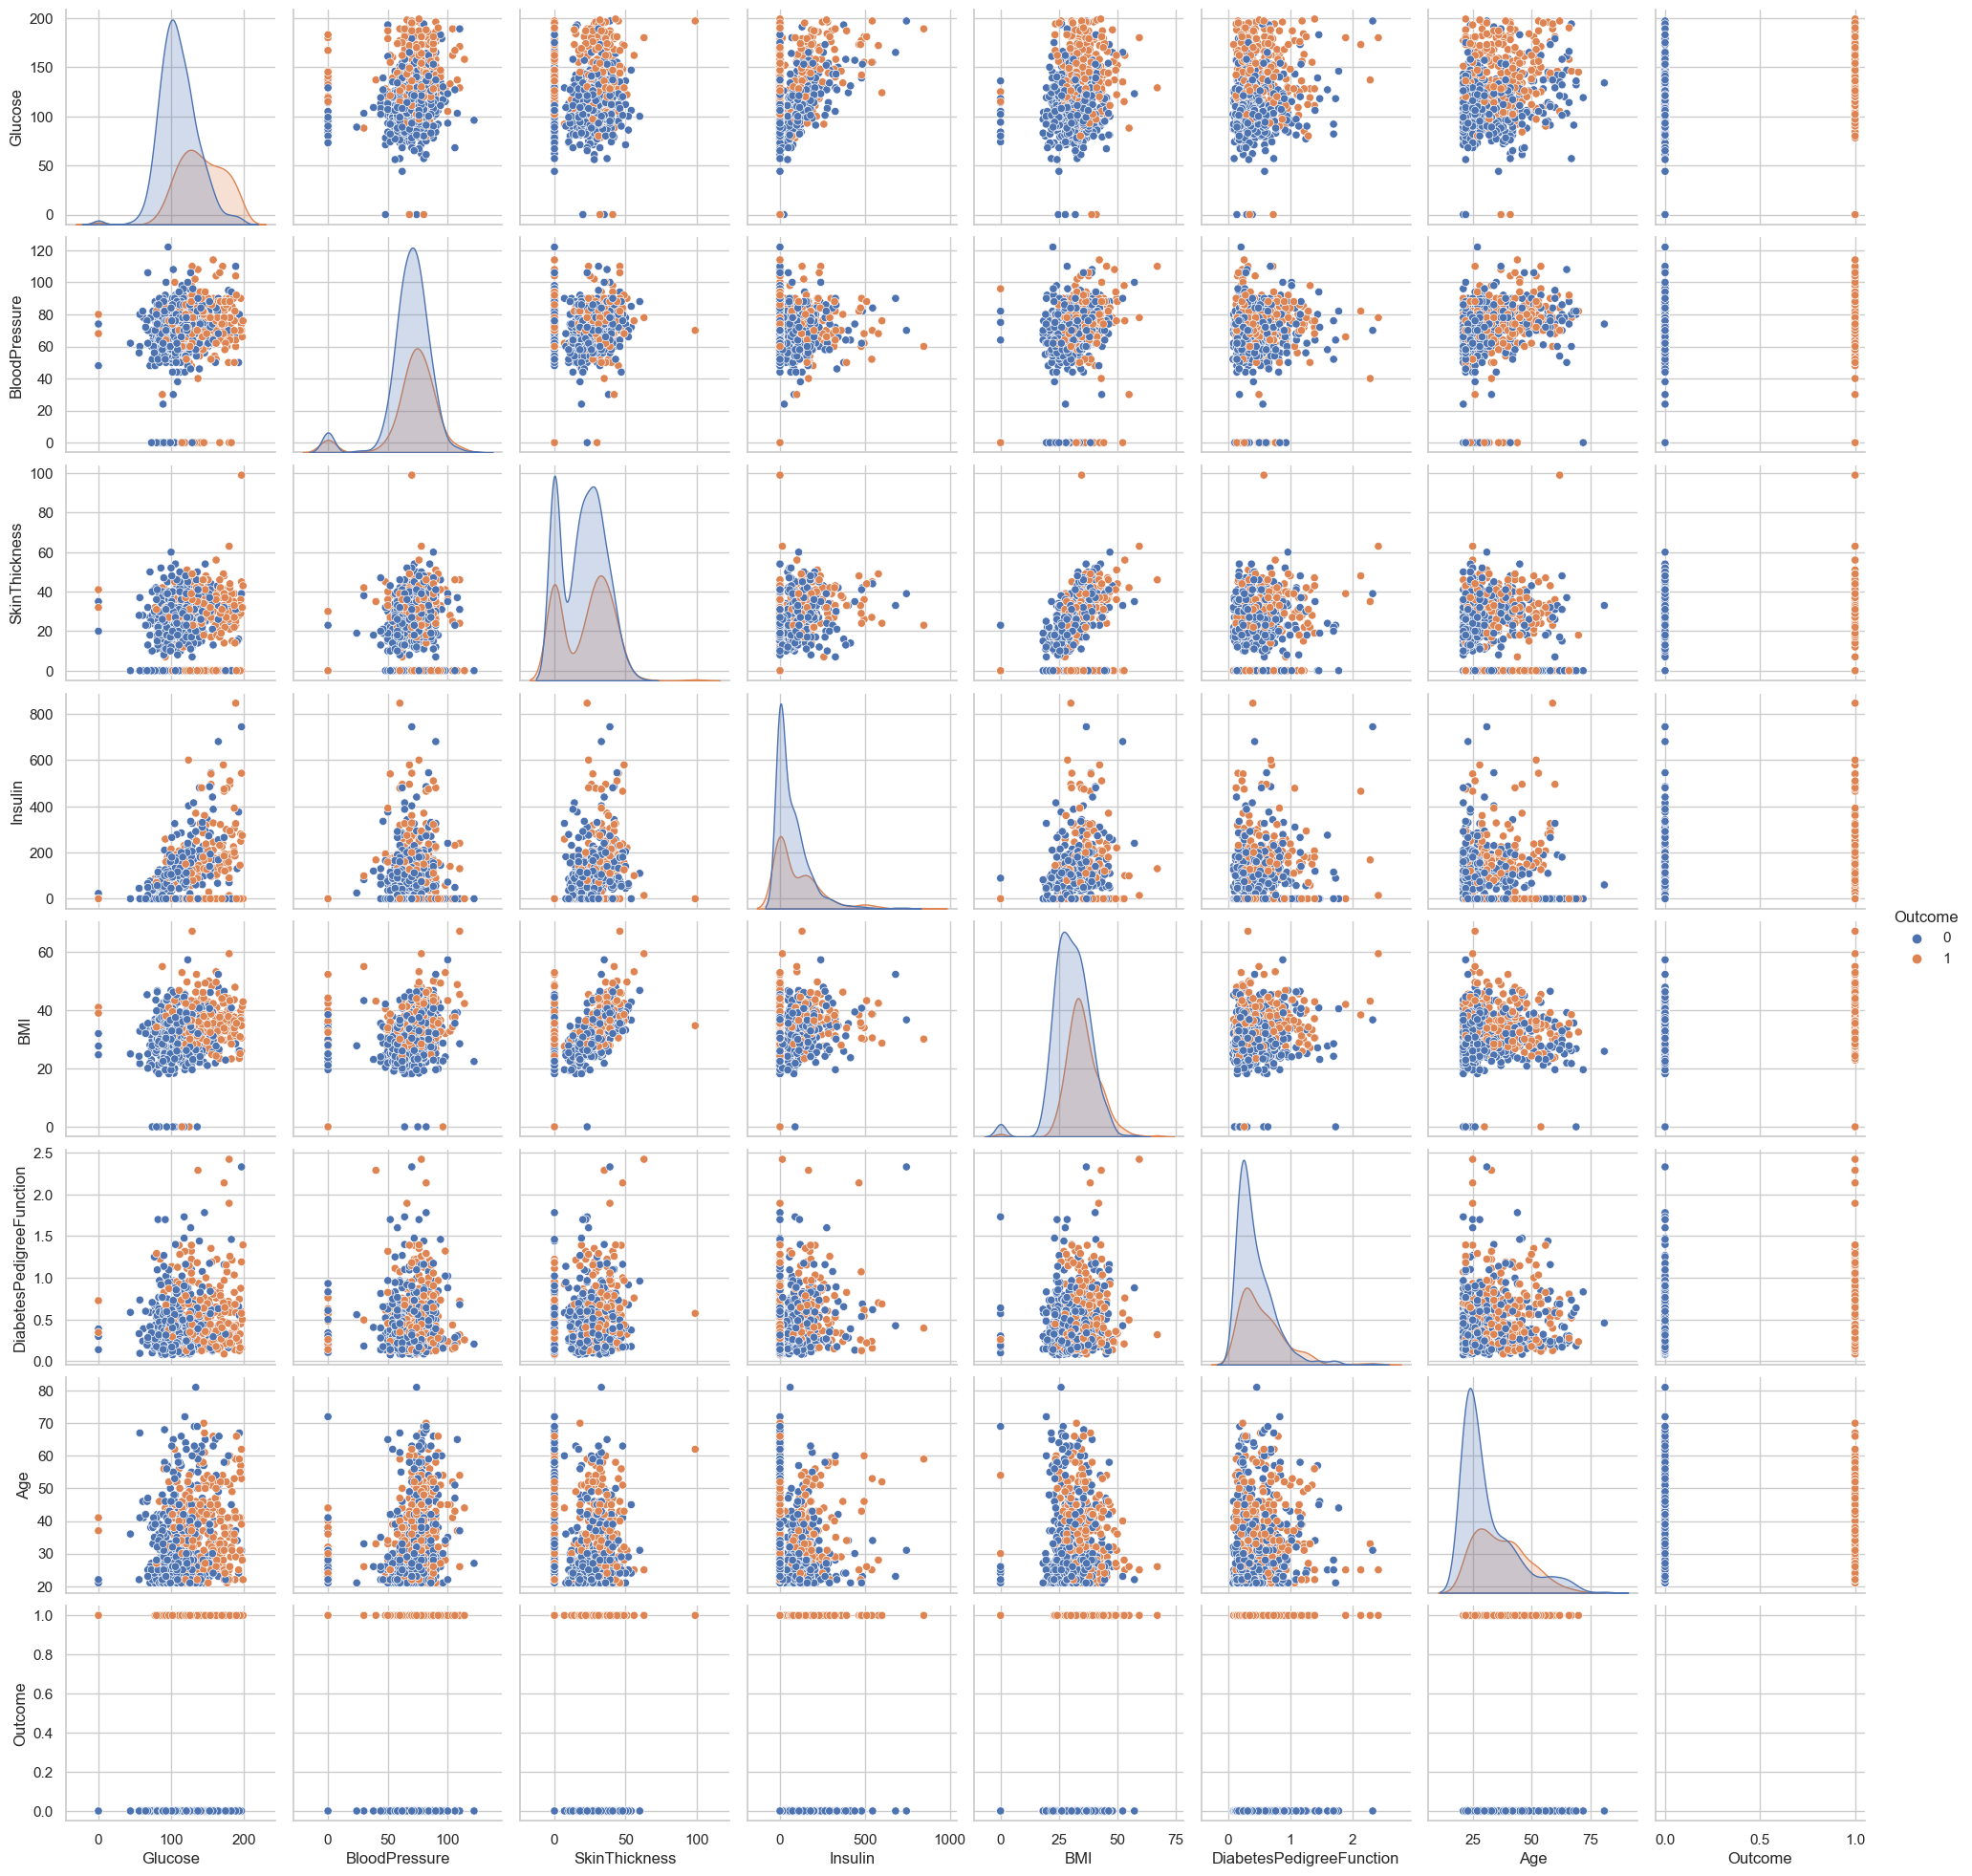

In [50]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

# DataFrame df에서 모든 수치형 특성을 자동으로 선택
# 여기서는 예를 들어 'label'이 범주형 변수라고 가정합니다.
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# 선택된 수치형 특성을 이용해 pairplot 생성
# 'label' 칼럼이 범주형 변수로 존재한다고 가정
sns.pairplot(df, vars=numeric_features, hue='Outcome')
plt.show()

### 9. classfier 모델 실습

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[116  14]
 [ 26  36]]


In [12]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.6875
[[111  19]
 [ 41  21]]


In [13]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7447916666666666
[[103  27]
 [ 22  40]]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7760416666666666
[[114  16]
 [ 27  35]]
